In [ ]:
import tarfile
from urllib.request import urlretrieve
url = "https://github.com/Elwing-Chou/mtkml/raw/master/fgo_icon.tar"
urlretrieve(url, "fgo.tar")
tar = tarfile.TarFile("fgo.tar")
tar.extractall()

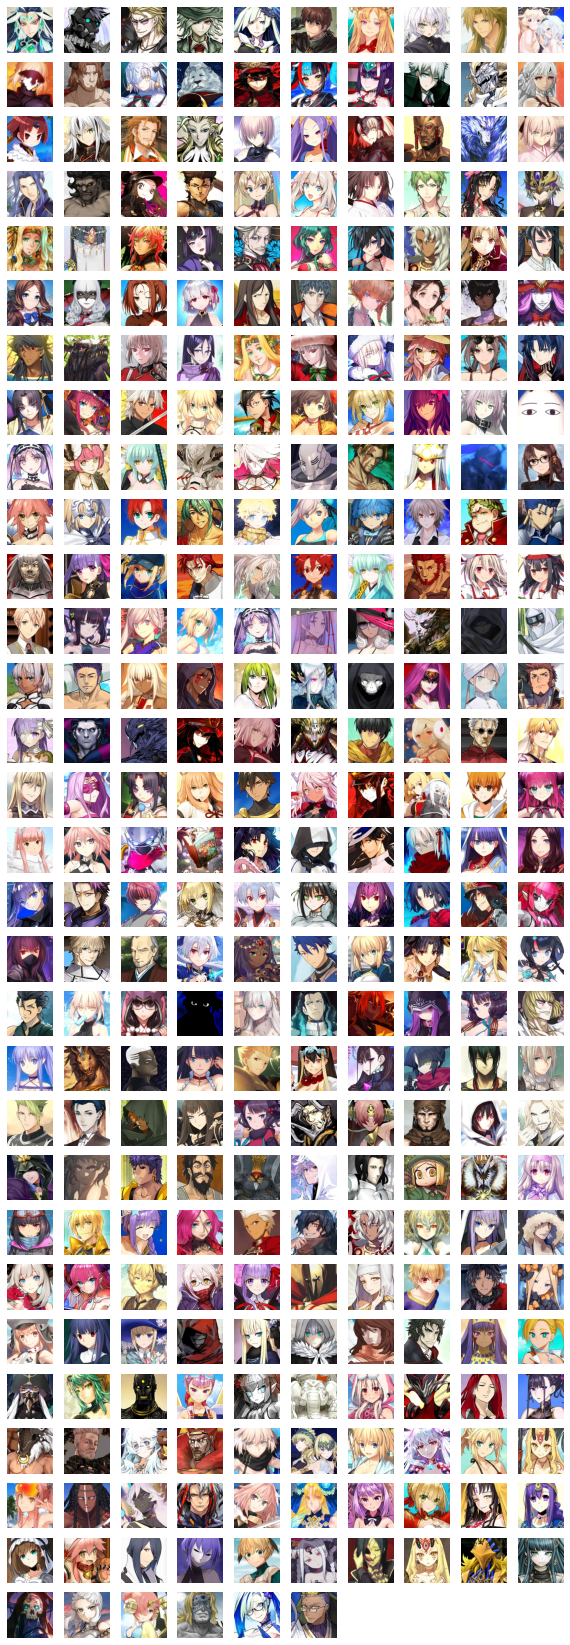

In [ ]:
import glob
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
pics = []
for fn in glob.glob("fgo_icon/*.png"):
    img = np.array(Image.open(fn).convert("RGB"))
    pics.append(img)
pics = np.array(pics)

plt.figure(figsize=(10, 30))
width = 10
height = len(pics) // width + 1
for i, img in enumerate(pics):
    plt.subplot(height, width, i+1)
    plt.axis("off")
    plt.imshow(img)

In [ ]:
import pandas as pd
print("before reshape:", pics.shape)
pics_reshape = pics.reshape(pics.shape[0], -1)
print("after reshape:", pics_reshape.shape)
pd.DataFrame(pics_reshape)

before reshape: (296, 128, 128, 3)
after reshape: (296, 49152)


0      1      2      3      4      ...  49147  49148  49149  49150  49151
0      161    161    144    161    161  ...    217    200    229    246    229
1      255    255    255    255    255  ...    217    234    217    217    234
2       18     18     18     18     18  ...    104    104     92     92     92
3       42     51     42     42     51  ...    166    149    166    166    149
4       90     73    141     80     63  ...      0     49      2      2     53
..     ...    ...    ...    ...    ...  ...    ...    ...    ...    ...    ...
291    127     93    127    127     93  ...    187    170    221    187    170
292    137    187    236    137    187  ...     55     47     55     55     47
293    189    197    205    201    209  ...    124    124    128    128    128
294    233    250    250    233    250  ...    179    179    212    179    179
295    247    247    255    247    247  ...     42     42     46     37     46

[296 rows x 49152 columns]

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=20)
pics_pca = pca.fit_transform(pics_reshape)
print("每個軸variance:", pca.explained_variance_ratio_)
print("加總:", sum(pca.explained_variance_ratio_))

每個軸variance: [0.23059968 0.06445426 0.05616374 0.03415942 0.02942252 0.02490515
 0.02040986 0.0178937  0.01650301 0.01295639 0.01255185 0.01057273
 0.01024364 0.0097452  0.00925099 0.00847243 0.00835071 0.00819308
 0.00763257 0.00713135]
加總: 0.5996122897025484


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

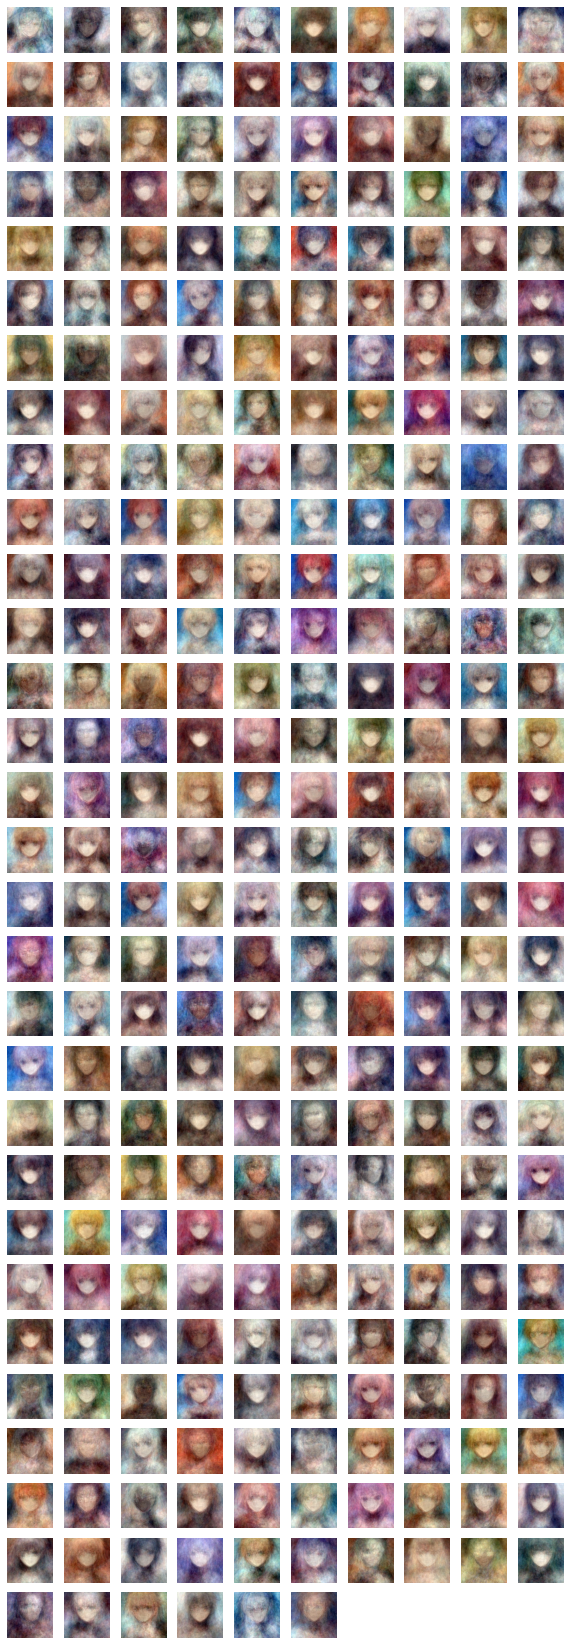

In [ ]:
from sklearn.preprocessing import minmax_scale

pics_pca_inv = pca.inverse_transform(pics_pca)
pics_pca_inv = minmax_scale(pics_pca_inv, axis=1)
pics_pca_inv_re = pics_pca_inv.reshape(pics.shape)
plt.figure(figsize=(10, 30))
width = 10
height = len(pics) // width + 1
for i, img in enumerate(pics_pca_inv_re):
    plt.subplot(height, width, i+1)
    plt.axis("off")
    plt.imshow(img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


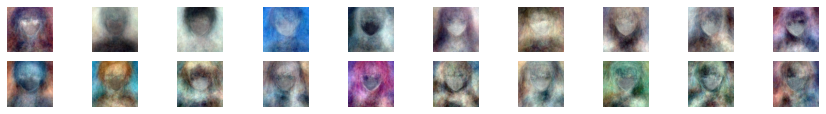

In [ ]:
component_re = minmax_scale(pca.components_, axis=1)
component_re = component_re.reshape(pca.components_.shape[0], 128, 128, 3)
plt.figure(figsize=(15, 30))
width = 10
height = len(pics) // width + 1
for i, img in enumerate(component_re):
    plt.subplot(height, width, i+1)
    plt.axis("off")
    plt.imshow(img)

In [ ]:
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)
x_test_tsne = tsne.fit_transform(pics_pca)
scaler = MinMaxScaler()
x_test_tsne_scale = scaler.fit_transform(x_test_tsne)

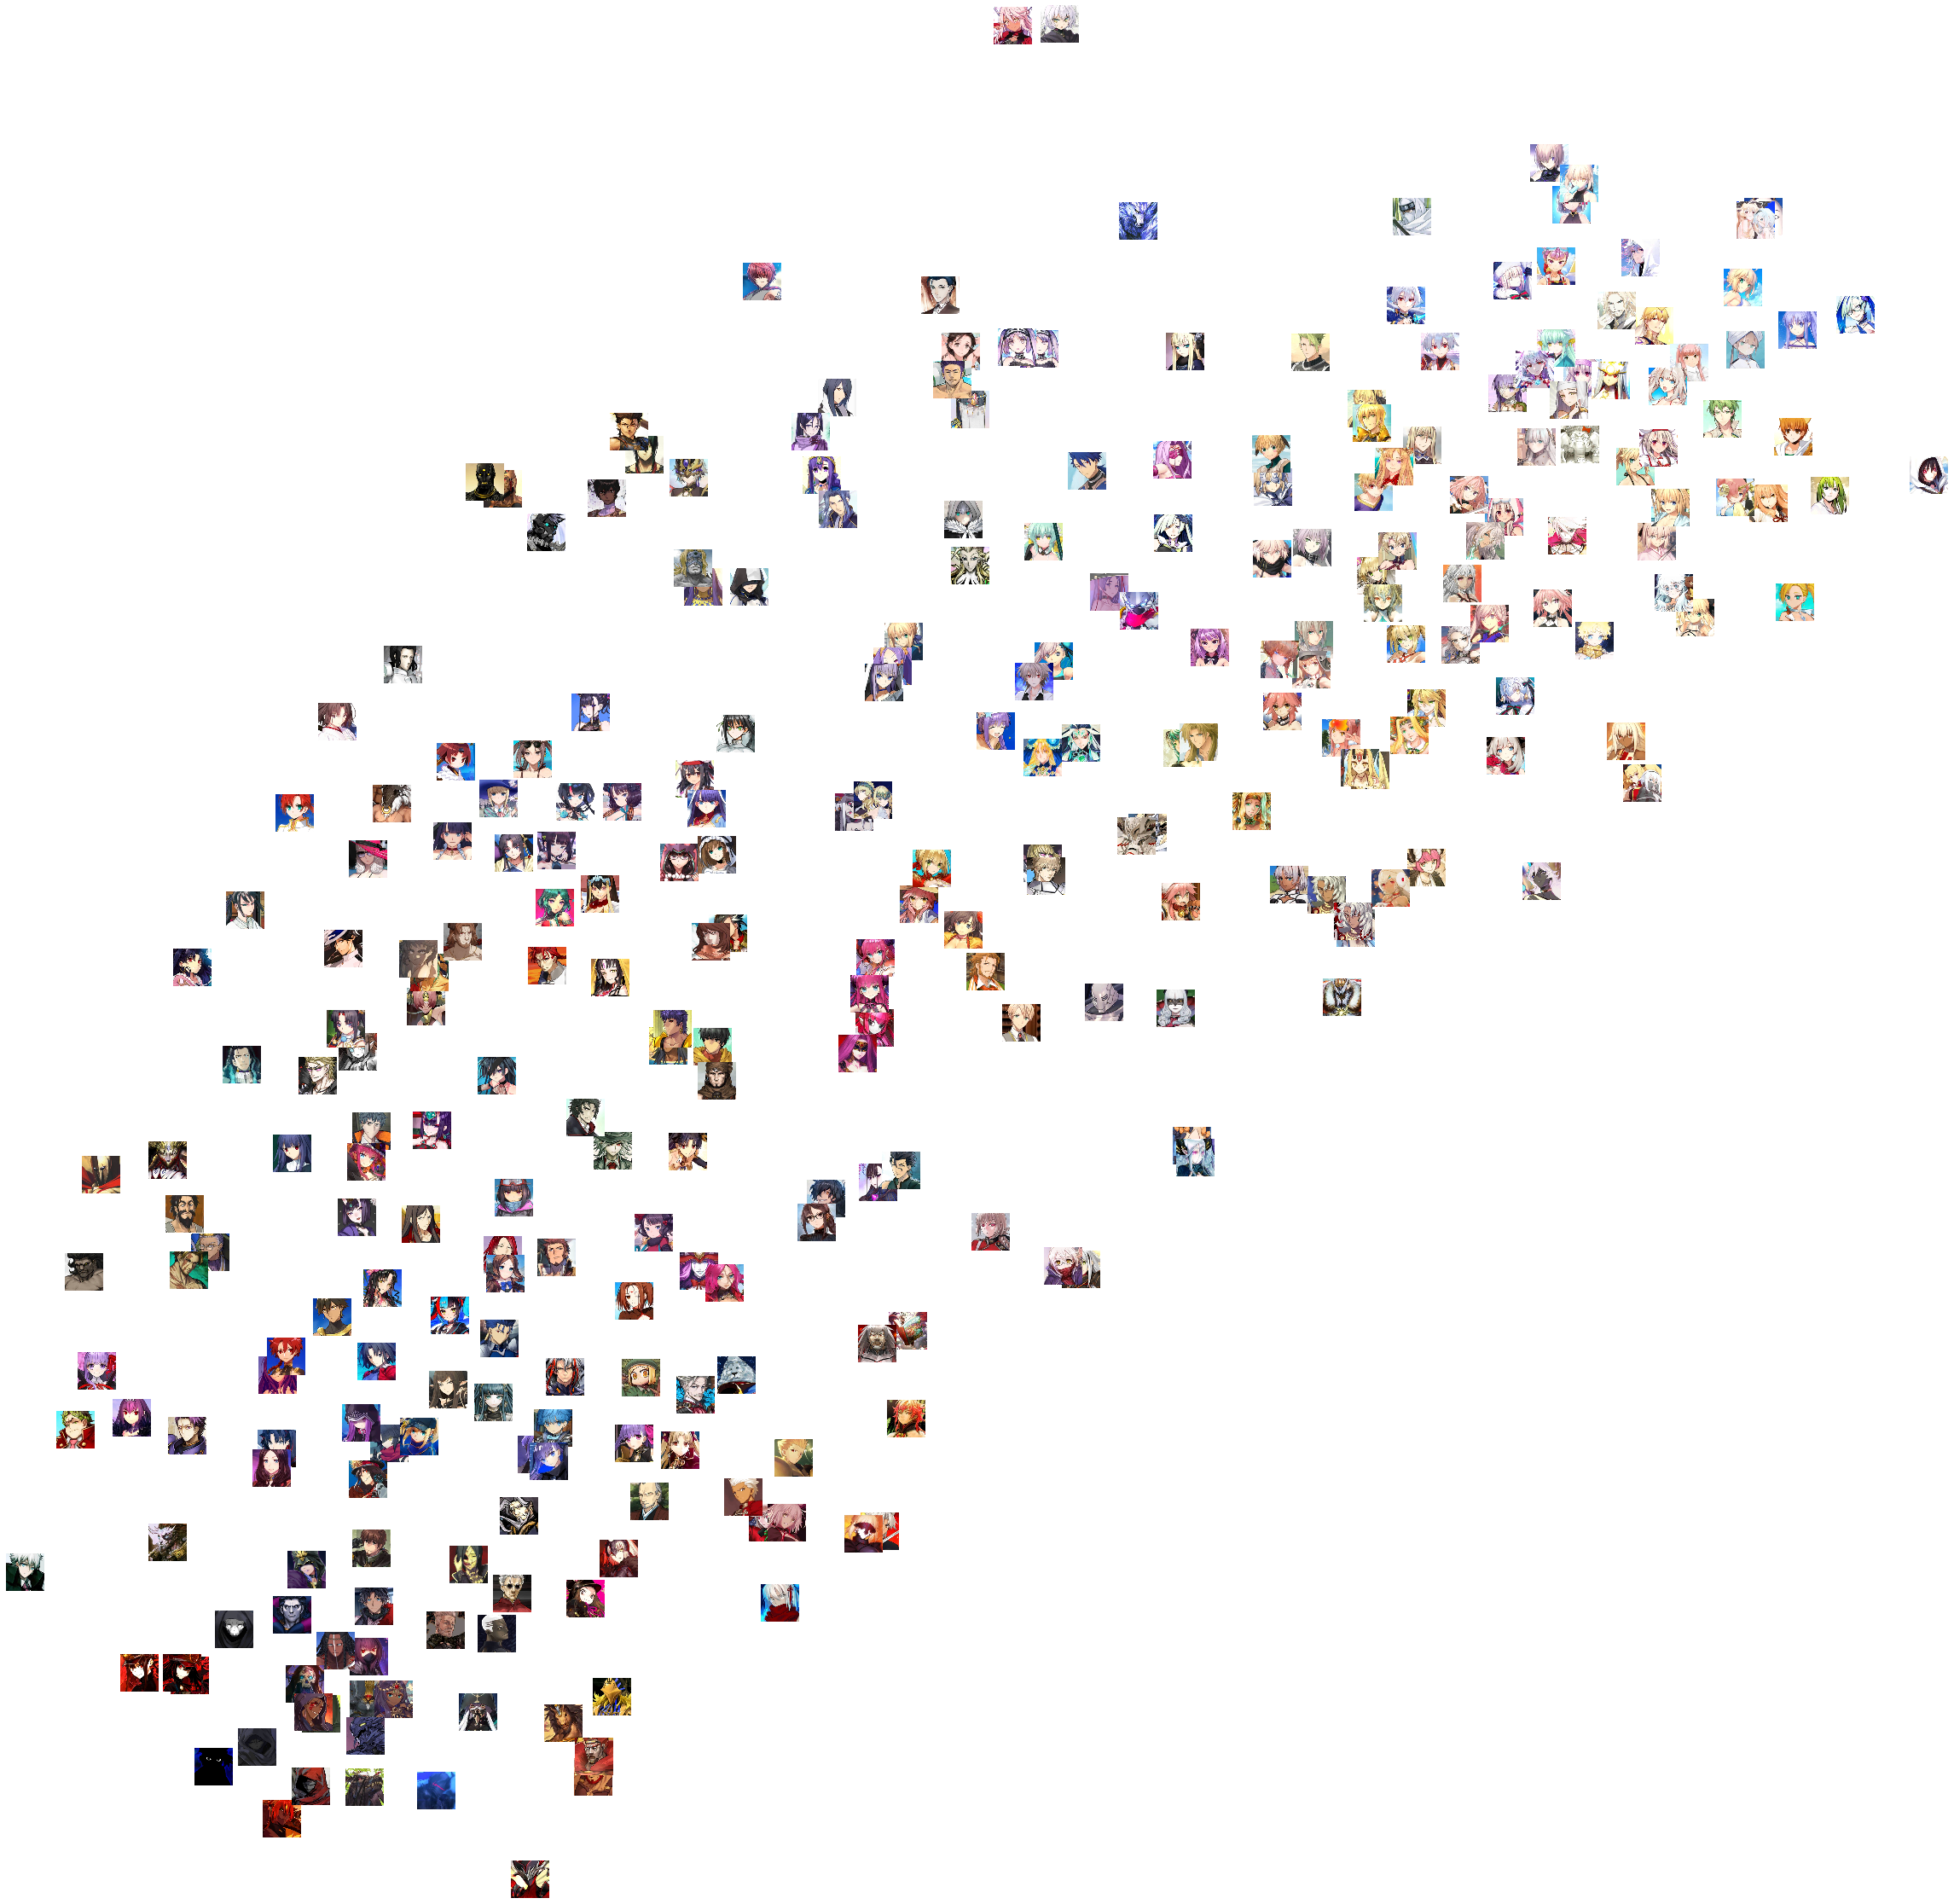

In [ ]:
from matplotlib import pyplot as plt
from matplotlib.image import BboxImage
from matplotlib.transforms import Bbox, TransformedBbox

# Create figure
fig = plt.figure(figsize=(40, 40))
ax = plt.subplot(1, 1, 1)
plt.axis("off")
xs = x_test_tsne_scale[:, 0]
ys = x_test_tsne_scale[:, 1]

for x, y, p in zip(xs, ys, pics):
    bb = Bbox.from_bounds(x, y, 0.02,0.02)  
    bb2 = TransformedBbox(bb, ax.transData)
    bbox_image = BboxImage(bb2, norm= None, origin=None, clip_on=False)
    bbox_image.set_data(p)
    ax.add_artist(bbox_image)